[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dhshah1112/CMPE_255_Assignment_7/blob/main/CMPE255_Assignment7_B.ipynb)


# Installing Libraries

In [ ]:
!pip install umap

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=86ff28df88e1e715044c6fbcf4afb1d57ca87e70b4c5e3f00ee4817aeb402655
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import umap.umap_ as umap


In [ ]:
# Data handling and processing
import numpy as np
import pandas as pd

# Machine Learning and Dimensionality Reduction
from sklearn.datasets import fetch_openml
from umap import UMAP
from sklearn.decomposition import PCA  # Optional for comparison

# Clustering Algorithms
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

# Evaluation Metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Loading Dataset

In [ ]:
# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
mnist_data = mnist.data / 255.0  # Normalize the data
mnist_labels = mnist.target.astype(int)

subset_indices = np.random.choice(range(len(mnist_data)), 10000, replace=False)
mnist_subset = mnist_data.iloc[subset_indices]
mnist_subset_labels = mnist_labels.iloc[subset_indices]


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Umap


In [ ]:
umap_reducer = UMAP(n_components=2, random_state=42)
mnist_umap_embeddings = umap_reducer.fit_transform(mnist_subset)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


# Clustering

In [ ]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_labels = agg_clustering.fit_predict(mnist_umap_embeddings)

# Gaussian Mixture Models
gmm = GaussianMixture(n_components=10, random_state=42)
gmm_labels = gmm.fit_predict(mnist_umap_embeddings)

# Evaluation
agg_silhouette = silhouette_score(mnist_umap_embeddings, agg_labels)
agg_calinski = calinski_harabasz_score(mnist_umap_embeddings, agg_labels)

gmm_silhouette = silhouette_score(mnist_umap_embeddings, gmm_labels)
gmm_calinski = calinski_harabasz_score(mnist_umap_embeddings, gmm_labels)

print(f"Agglomerative Clustering - Silhouette Score: {agg_silhouette}, Calinski-Harabasz Index: {agg_calinski}")
print(f"Gaussian Mixture Model - Silhouette Score: {gmm_silhouette}, Calinski-Harabasz Index: {gmm_calinski}")


Agglomerative Clustering - Silhouette Score: 0.5512489676475525, Calinski-Harabasz Index: 30691.13355487814
Gaussian Mixture Model - Silhouette Score: 0.5227211713790894, Calinski-Harabasz Index: 27771.44117291223


# Visualizations

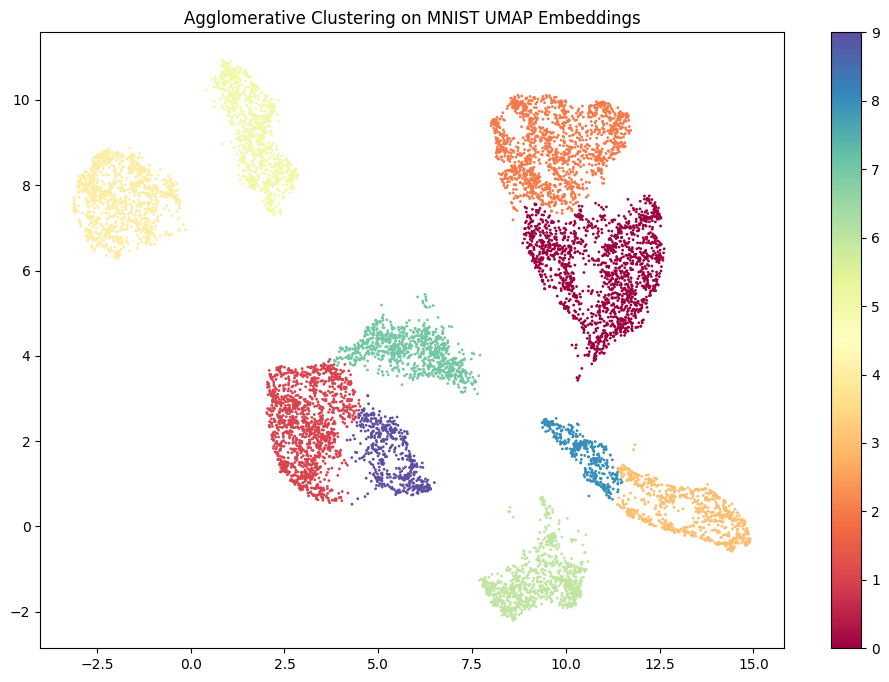

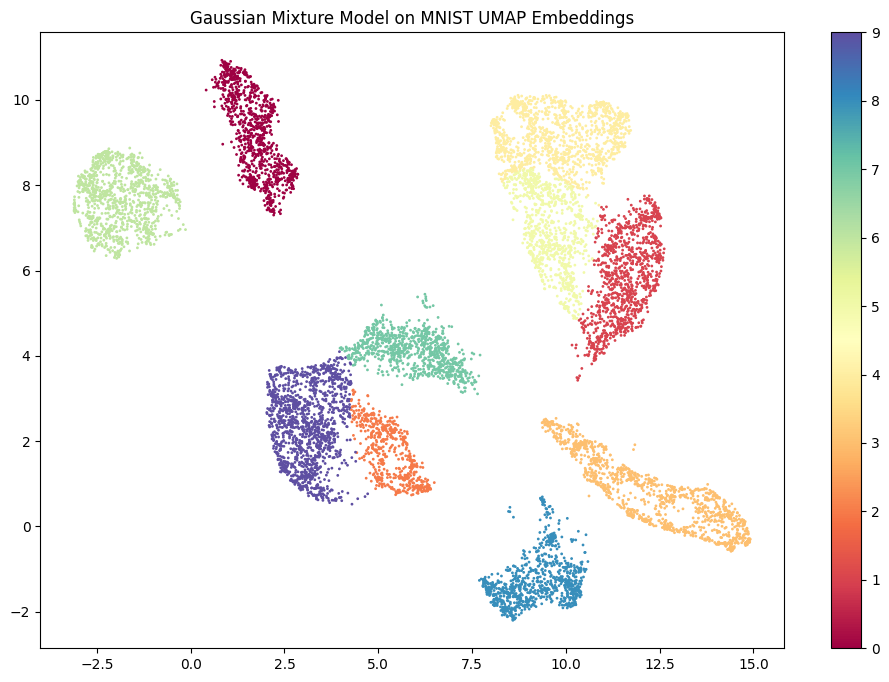

In [ ]:
def plot_clusters(embeddings, labels, title):
    plt.figure(figsize=(12, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='Spectral', s=1)
    plt.colorbar()
    plt.title(title)
    plt.show()

plot_clusters(mnist_umap_embeddings, agg_labels, "Agglomerative Clustering on MNIST UMAP Embeddings")
plot_clusters(mnist_umap_embeddings, gmm_labels, "Gaussian Mixture Model on MNIST UMAP Embeddings")


# Classification and Umap

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline

# Generate toy dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,  # Reduced number of features for simplicity
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

print("Random Forest - Classification Report")
print(classification_report(y_test, rf_predictions))


Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.91      0.89      0.90       102

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [ ]:
# UMAP Transformation followed by Logistic Regression
umap_transformer = UMAP(n_components=5, random_state=42)  # Reducing to 5 dimensions
log_reg_classifier = LogisticRegression(random_state=42)

pipeline = Pipeline([("umap", umap_transformer), ("log_reg", log_reg_classifier)])
pipeline.fit(X_train, y_train)
pipeline_predictions = pipeline.predict(X_test)

print("UMAP + Logistic Regression - Classification Report")
print(classification_report(y_test, pipeline_predictions))


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP + Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        98
           1       0.89      0.78      0.83       102

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



# Comparing classification and (Classification + Umap)

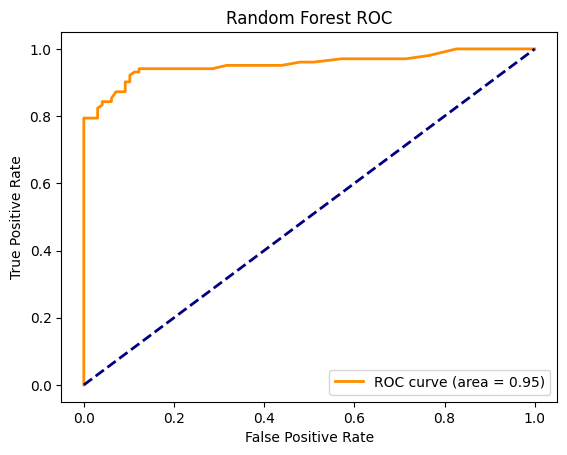

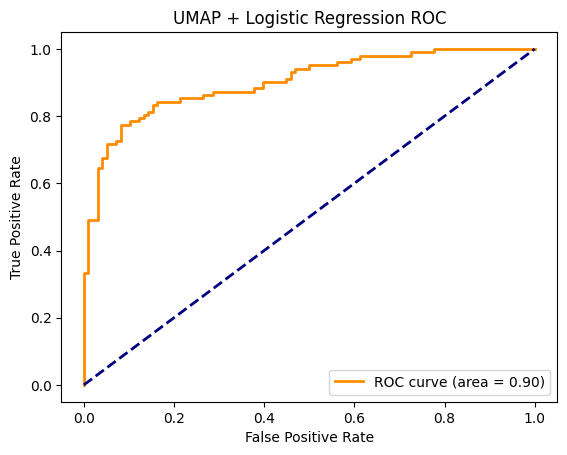

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC Curve
def plot_roc_curve(y_test, predictions, title):
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC Curve for Random Forest
plot_roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1], "Random Forest ROC")

# Plot ROC Curve for UMAP + Logistic Regression
plot_roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1], "UMAP + Logistic Regression ROC")
